In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [15]:
import pandas as pd

iris = load_iris()
print(iris.keys())
print('iris target 이름:', iris.target_names )

iris_data = iris.data # 독립변수
iris_label = iris.target # 종속변수

iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()
# iris_df.label.value_counts()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
iris target 이름: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [16]:
# 학습용, 검증용 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(iris_data,
                                                iris_label,
                                                test_size=0.2,
                                                random_state=11)

In [17]:
# 학습 수행
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=3,random_state=156)
dt_clf.fit(X_train,y_train) 

DecisionTreeClassifier(max_depth=3, random_state=156)

In [18]:
# 예측 수행
pred = dt_clf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333


### [결정 트리]  

Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node)에는 분석 대상의 속성들이 위치

* 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
 - 해당 속성이 갖는 값을 이용하여 새로운 가지(branch)를 만듬
 - 데이터를 분류시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 하는데 최대한 균일한 
   데이터 세트를 구성할 수 있도록 분할하는 것이 필요
 - 결정 노드는 정보 균일도가  높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만드는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측 
* 데이터 분류 시 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 함
 - 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듬
 - 정보의 균일도라는 룰을 기반으로 알고리즘이 쉽고 직관적이며 어떻게 규칙 노드와 리프 노드가 
   만들어지는지  알수 있고 시각화로 표현할 수 있는 장점
 - 균일도가 다양하게 존재할 수록 트리의 깊이가 커지고 복잡해 지며 과적합으로 정확도가 떨어진다는 단점
 - 모든 데이터 상황을 만족하는 완벽한규칙은 없다고 인정하고 더 나은 성능을 보장하기 위하여 성능 튜닝을 통하여 트리의 크기를 사전에 제한하는 것이 요구됨
 - 정보 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득 지수와 지니 계수가 있음
 - 정보 이득은 엔트로피 개념을 기반으로 하며 엔트로피는 주어진 데이터 집합의 혼잡도임. 서로 다른 값이 섞여 있으면 엔트로피 높음  
   정보 이득 지수 = 1 - 엔트로피(혼잡도)지수. 정보 이득이 높은 속성을 기준으로 분할
 - 지니 계수는 경제학에서 불평등 지수를 나타낼 때 사용하는 계수. 0이 가장 평등하고 1로 갈수록 불평등. 
   데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 경우에는 불평등. 
   다양성이 낮을 수록 균일도가 높다는 의미로서 1로 갈수록 균일도가 높으므로 지니 계수가 높은 속성을 기준으로 분할
* 결정 트리 구조 : 규칙 노드(규칙 조건), 리프 노드(결정된 클래스 값), 서브 트리(새로운 규칙 조건마다 규칙 노드 기반의 서브트리 생성)
* 파라미터 : min_samples_split, min_samples_leaf, max_features, max_depth, max_leaf_nodes

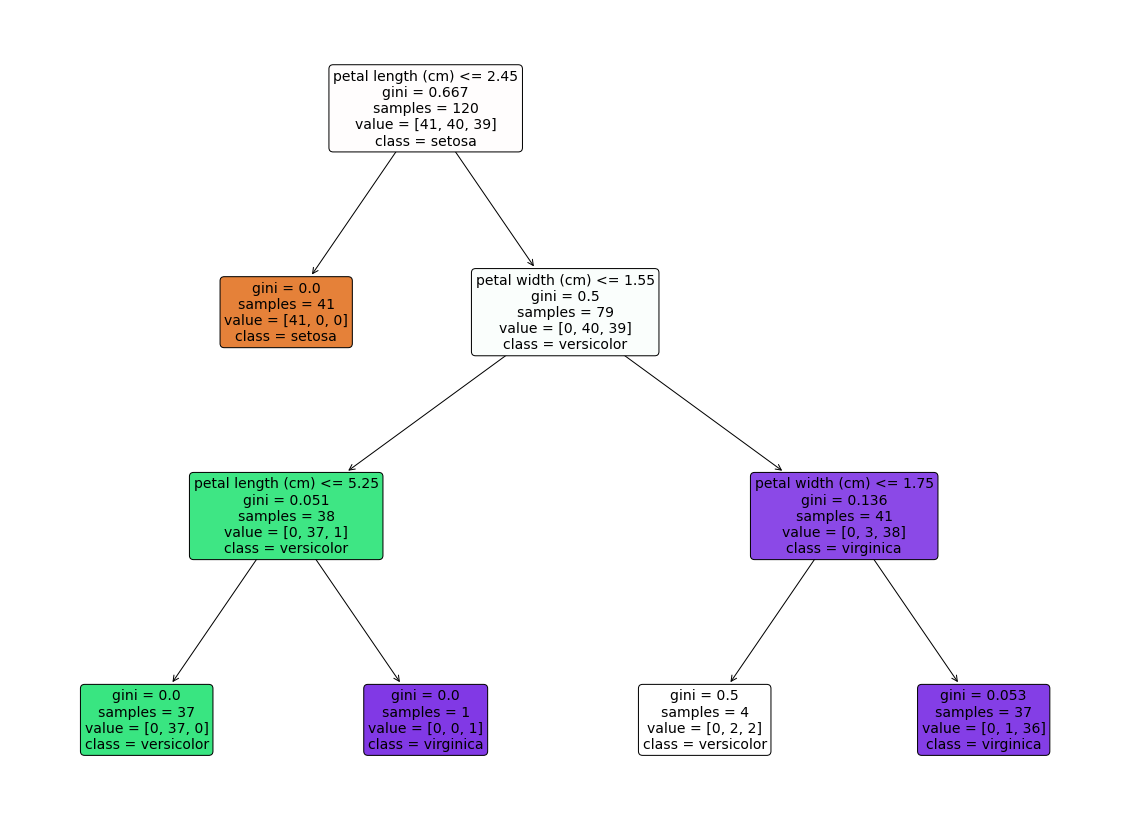

In [20]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize = (20,15))
tree.plot_tree(dt_clf,filled=True,
              feature_names=iris.feature_names,
              class_names=iris.target_names,
              rounded=True,fontsize=14)
plt.show()

In [ ]:
# Graphviz 다운로드 사이트
import webbrowser
webbrowser.open("https://graphviz.org/download/")

Feature importances:
[0.    0.    0.558 0.442]

sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<AxesSubplot:>

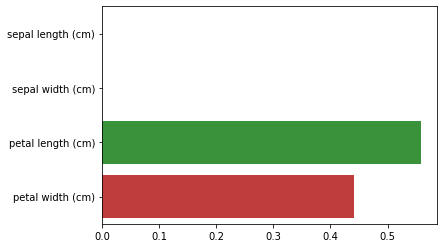

In [24]:
import seaborn as sns
import numpy as np

# feature별 importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))
print()
# feature별 importance 매핑
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
# 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)